In [1]:
%matplotlib inline
import sys
sys.path.append('./opmap/opmap/')

In [2]:
from opmap.videoData import VideoData
from opmap.rawCam import RawCam
from opmap.vmemMap import VmemMap
from opmap.phaseMap import PhaseMap
from opmap.phaseVarianceMap import PhaseVarianceMap

In [3]:
from elecpy_result import ElecpyResult

## Parameters

In [4]:
path = "/mnt/recordings/SimulationResult/2018-02-01/"

In [5]:
showFrame = 230

## VmemMap

In [6]:
r = ElecpyResult(path)

In [7]:
data = r.extract(['vmem'])['vmem']

In [8]:
cam = VideoData(*(data.shape))
cam.data = -data
vmem = VmemMap(cam)

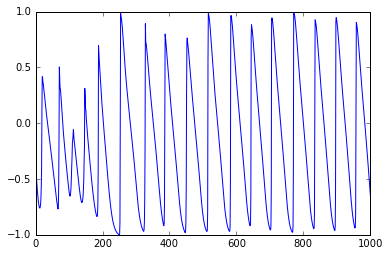

In [9]:
vmem.plot([[100,100]])

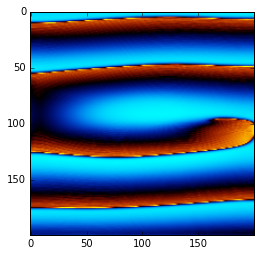

In [10]:
vmem = VmemMap(cam)
vmem.showFrame(showFrame)

## PhaseMap

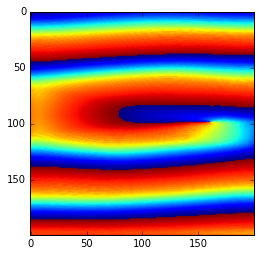

In [11]:
pmap = PhaseMap(vmem)
pmap.showFrame(showFrame)

## PhaseVarianceMap

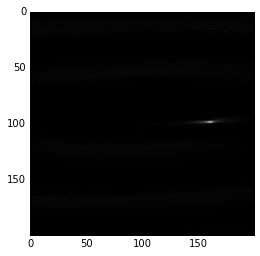

In [18]:
pvmap = PhaseVarianceMap(pmap, size=3)
pvmap.showFrame(showFrame)

In [19]:
vmem.saveImage('/mnt/nas/2018-03-30/vmem')
pmap.saveImage('/mnt/nas/2018-03-30/pmap')
pvmap.saveImage('/mnt/nas/2018-03-30/pvmap')

In [21]:
import matplotlib.pyplot as plt

In [142]:
x_max = 170
x_min = 160
y_max = 110
y_min = 100
m = 10
x_mean = y_mean = (x_max+x_min)//2

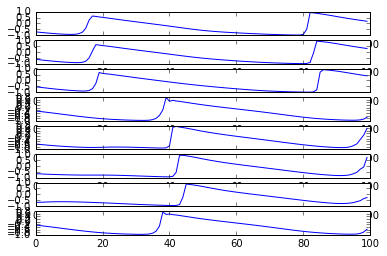

In [143]:
plt.subplot(811)
plt.plot(vmem.data[450:550,y_max,x_min])
plt.subplot(812)
plt.plot(vmem.data[450:550,y_max,x_mean])
plt.subplot(813)
plt.plot(vmem.data[450:550,y_max,x_max])
plt.subplot(814)
plt.plot(vmem.data[450:550,y_mean,x_max])
plt.subplot(815)
plt.plot(vmem.data[450:550,y_min,x_max])
plt.subplot(816)
plt.plot(vmem.data[450:550,y_min,x_mean])
plt.subplot(817)
plt.plot(vmem.data[450:550,y_min,x_min])
plt.subplot(818)
plt.plot(vmem.data[450:550,y_mean,x_min])

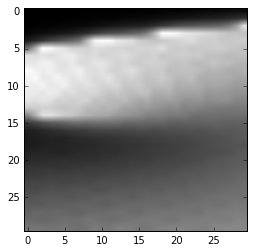

In [144]:
plt.imshow( vmem.data[500, y_min-m:y_max+m, x_min-m:x_max+m] , cmap='gray')

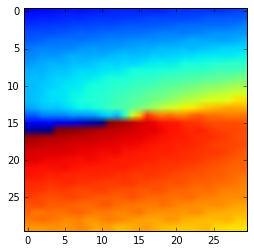

In [145]:
plt.imshow( pmap.data[500, y_min-m:y_max+m, x_min-m:x_max+m] )